# Lepton reco vs $L_{xy}$ and $\Delta R$

I want to measure the fraction of dark photon decays that result in 0, 1, or 2 (or more) electrons, photons, PF muons, and DSA muons as a function dark photon $L_xy$ and di-lepton $\Delta R$.

In [1]:
# python
import sys
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, llpnanoaodschema
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
importlib.reload(llpnanoaodschema)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

Start with low-ctau sample and just plot the number of PF muons that pass the LJ source cuts and are within dR=0.5 of a dark photon that decays to muons at gen level. Choose a few different bound state and dark photon mass combos that more or less span the possible $\Delta R$ values.

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

<Client: 'tls://192.168.161.138:8786' processes=1 threads=1, memory=2.89 GiB>

In [3]:
# ctau for Lxy = 0.3cm
samples = [
    "2Mu2E_100GeV_0p25GeV_0p02mm",
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_1000GeV_0p25GeV_0p002mm",
    "2Mu2E_1000GeV_5p0GeV_0p04mm",
]
max_files=-1
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=max_files, location_cfg="signal_2mu2e_v10.yaml")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.DaskExecutor(client=client),
    schema=llpnanoaodschema.LLPNanoAODSchema,
    #maxchunks=1,
    skipbadfiles=True,
)

channels = ["baseNoLj"]
p = sidm_processor.SidmProcessor(
    channels,
    [
        "genA_base",
        "genMu_base",
        "genE_base",
        "lepton_genA_base",
    ],
)

In [4]:
output = runner.run(fileset, treename="Events", processor_instance=p)
out = output["out"]

Output()

Output()

2Mu2E_1000GeV_5p0GeV_0p04mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_100GeV_0p25GeV_0p02mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_100GeV_5p0GeV_0p4mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_1000GeV_0p25GeV_0p002mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb


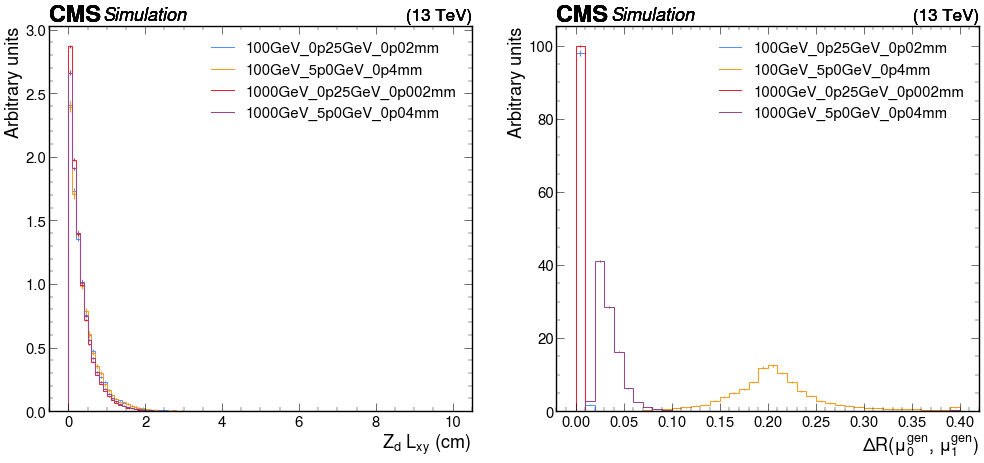

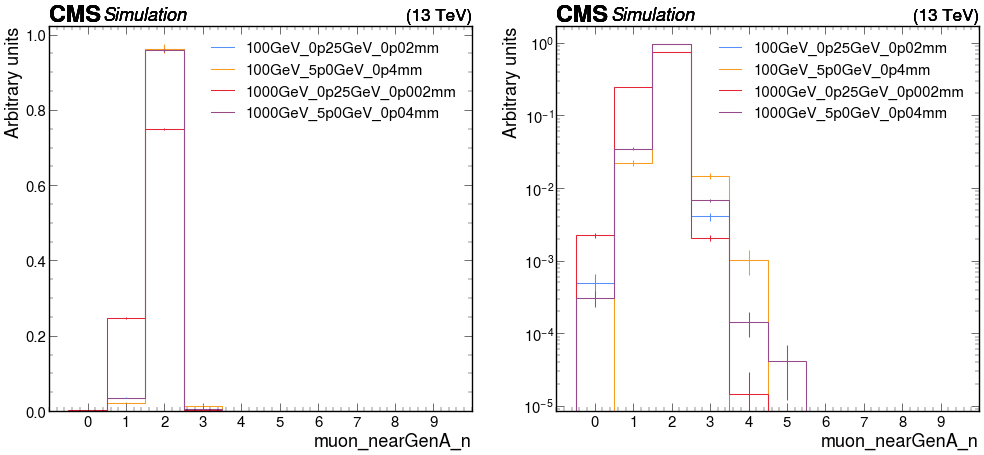

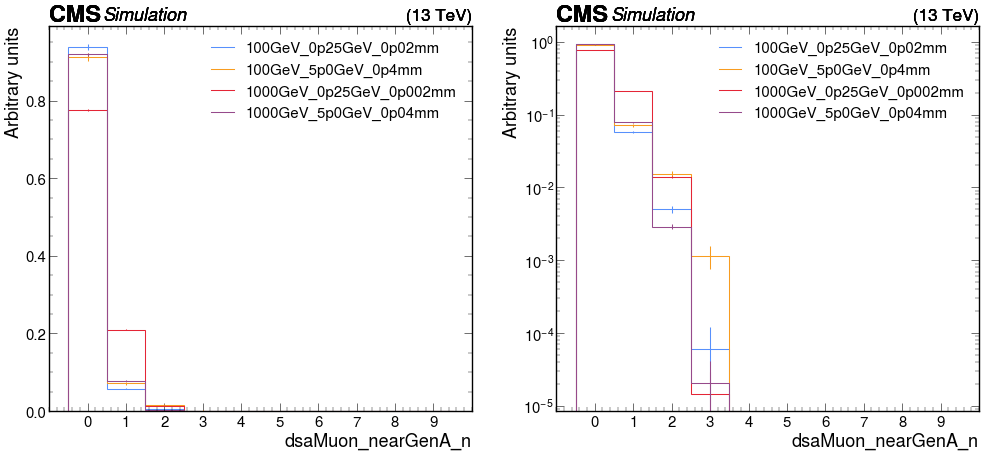

In [27]:
legend_entries = [s[6:] for s in samples]
nplots = 2
channels = ["baseNoLj"]

# lxy and dR for reference
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genAs_lxy_lowRange"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genMu_genMu_dR_lowRange"][channels[0], :0.4j], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")

# number of muons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["muon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["muon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")
plt.yscale("log")

# number of DSA muons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["dsaMuon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["dsaMuon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")
plt.yscale("log")

Cool, so for promptly decaying dark photons, we get 2 PF muons about 95% of the time for all but the most collimated sample. Interesting that the 100GeV, 0.25GeV sample behaves more like the 5GeV dark photon samples. DSA muons are mostly irrelavant, but distinctly most relevant for the 1000GeV, 0.25GeV sample. I wonder if there's something about the pf/dsa cross-cleaning that's a little funny for the highest-pT muons.

Repeat the above exercise for electrons and photons

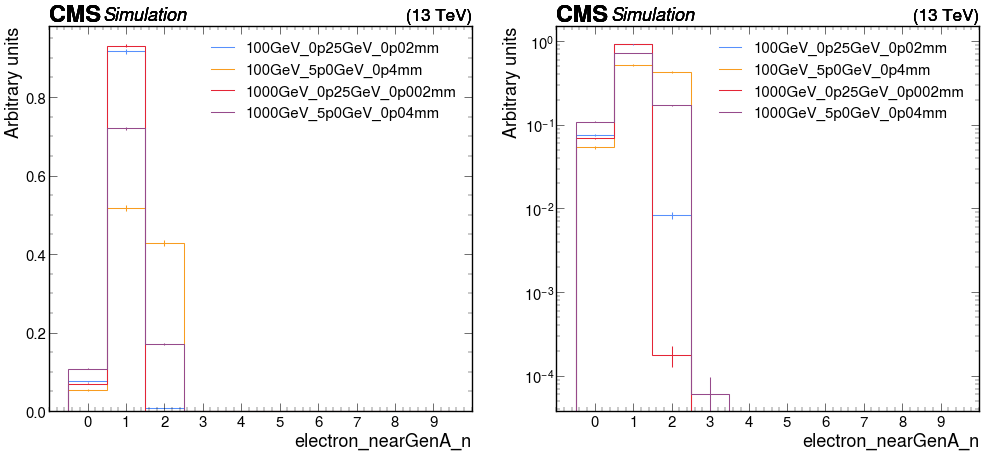

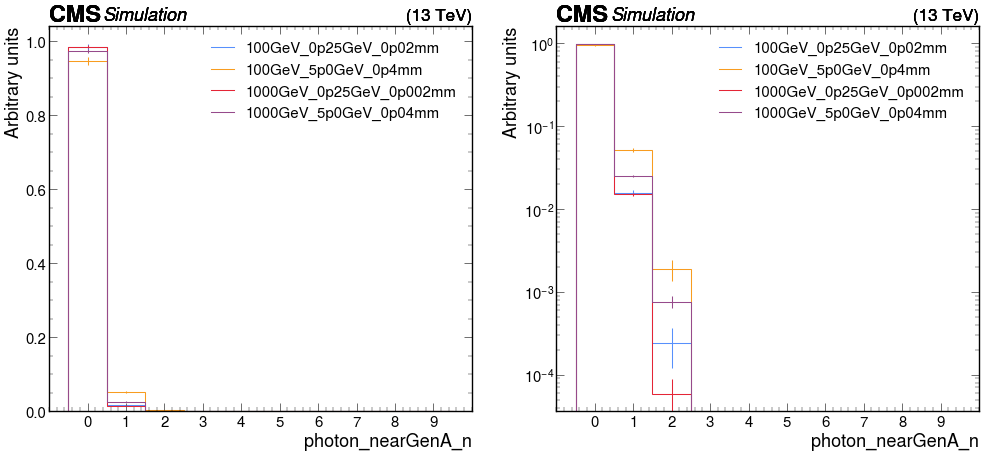

In [28]:
legend_entries = [s[6:] for s in samples]
nplots = 2

# number of electrons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")
plt.yscale("log")

# number of photons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, alignment="left")
plt.ylabel("Arbitrary units")
plt.yscale("log")

The fraction of dark photon decays that result in two reco electrons is low across the board. The ordering in the two-PF-electron bin makes sense (higher $\Delta R$ corresponds to higher probability of reconstructing two PF electrons). I don't understand the ordering of the zero-PF-electron bin. It's unclear to me why the probability of reconstructing a photon near the dark photon goes down with increasing collimation.

Ok, I can think of a few good next steps. Options:
- Repeat above for longer-lived dark photons
- Make 2D plots vs dark photon Lxy or gen-lepton dR
- Investigate properties of reco leptons in cases where one or two were reconstructed (e.g. are there any merged electrons that carry the full dark photon pT?)
- Look into summing output across signal samples so I can smoothly scan across gen-lepton dR

Start with option 1 and just repeat previous exercise for dark photons with 3, 30, and 300cm average lab-frame transverse decay length.

In [7]:
# ctau for Lxy = 3cm
samples_3cm = [
    "2Mu2E_100GeV_0p25GeV_0p2mm",
    "2Mu2E_100GeV_5p0GeV_4p0mm",
    "2Mu2E_1000GeV_0p25GeV_0p02mm",
    "2Mu2E_1000GeV_5p0GeV_0p4mm",
]
fileset_3cm = utilities.make_fileset(samples_3cm, "llpNanoAOD_v2", max_files=max_files, location_cfg="signal_2mu2e_v10.yaml")

In [8]:
output_3cm = runner.run(fileset_3cm, treename="Events", processor_instance=p)
out_3cm = output_3cm["out"]

Output()

Output()

2Mu2E_1000GeV_5p0GeV_0p4mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_100GeV_0p25GeV_0p2mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_100GeV_5p0GeV_4p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_1000GeV_0p25GeV_0p02mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb


Text(0, 1, 'Arbitrary units')

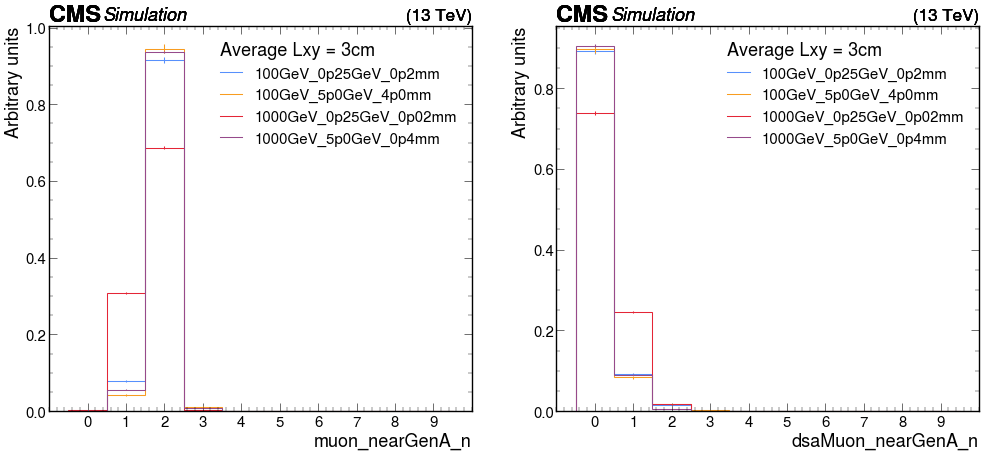

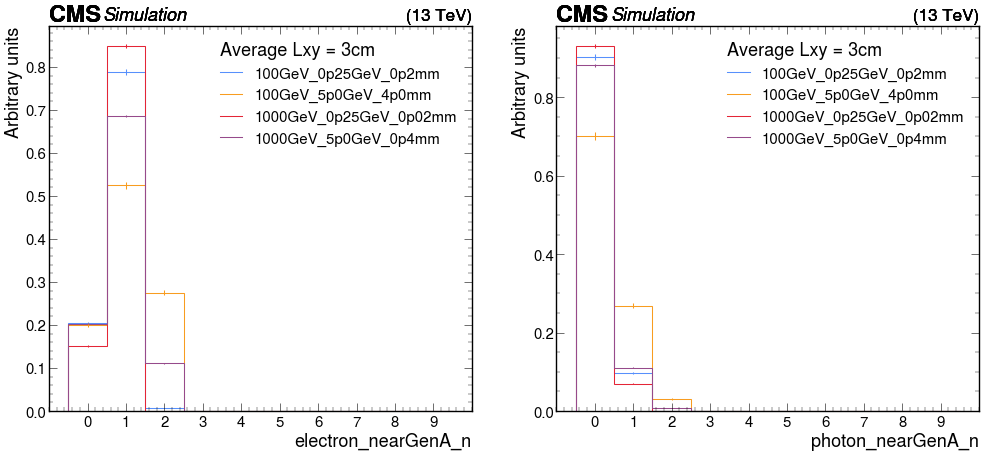

In [29]:
legend_entries = [s[6:] for s in samples_3cm]
nplots = 2

# number of muons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples_3cm:
    utilities.plot(out_3cm[sample]["hists"]["muon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 3cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of DSA muons near dark photon
plt.subplot(1, nplots, 2)
for sample in samples_3cm:
    utilities.plot(out_3cm[sample]["hists"]["dsaMuon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 3cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of electrons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples_3cm:
    utilities.plot(out_3cm[sample]["hists"]["electron_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 3cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of photons near dark photon
plt.subplot(1, nplots, 2)
for sample in samples_3cm:
    utilities.plot(out_3cm[sample]["hists"]["photon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 3cm", alignment="left")
plt.ylabel("Arbitrary units")

In [10]:
# ctau for Lxy = 30cm
samples_30cm = [
    "2Mu2E_100GeV_0p25GeV_2p0mm",
    "2Mu2E_100GeV_5p0GeV_40p0mm",
    "2Mu2E_1000GeV_0p25GeV_0p2mm",
    "2Mu2E_1000GeV_5p0GeV_4p0mm",
]
fileset_30cm = utilities.make_fileset(samples_30cm, "llpNanoAOD_v2", max_files=max_files, location_cfg="signal_2mu2e_v10.yaml")

In [11]:
output_30cm = runner.run(fileset_30cm, treename="Events", processor_instance=p)
out_30cm = output_30cm["out"]

Output()

Output()

2Mu2E_1000GeV_5p0GeV_4p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_100GeV_0p25GeV_2p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_100GeV_5p0GeV_40p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_1000GeV_0p25GeV_0p2mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb


Text(0, 1, 'Arbitrary units')

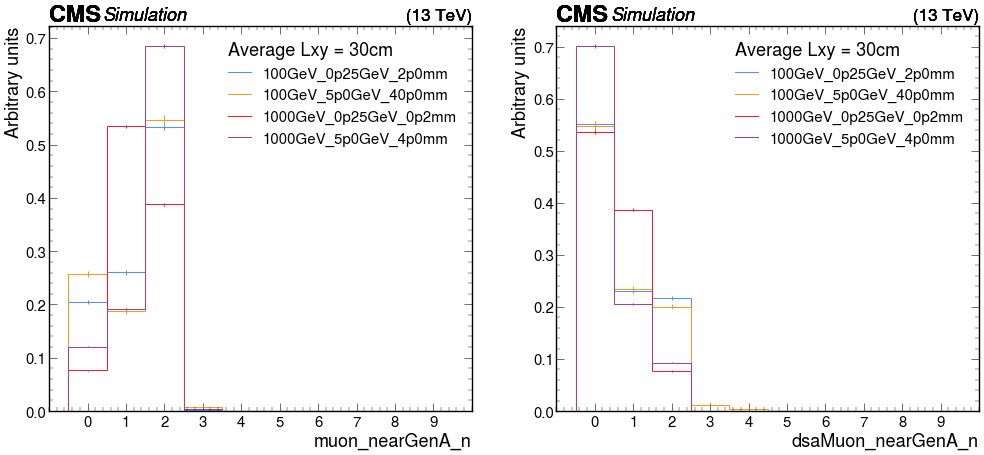

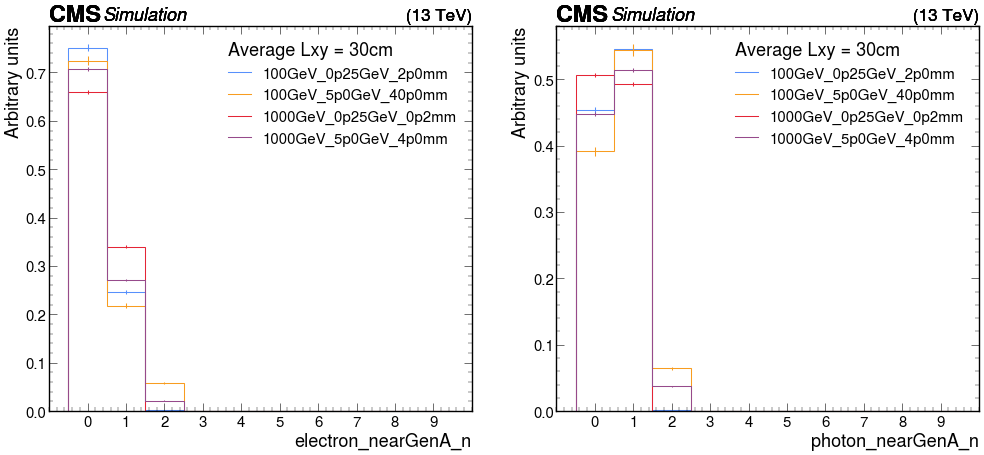

In [30]:
legend_entries = [s[6:] for s in samples_30cm]
nplots = 2

plt.subplots(1, nplots, figsize=(nplots*12, 10))
# number of muons near dark photon
plt.subplot(1, nplots, 1)
for sample in samples_30cm:
    utilities.plot(out_30cm[sample]["hists"]["muon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 30cm", alignment="left")
plt.ylabel("Arbitrary units")
# number of DSA muons near dark photon
plt.subplot(1, nplots, 2)
for sample in samples_30cm:
    utilities.plot(out_30cm[sample]["hists"]["dsaMuon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 30cm", alignment="left")
plt.ylabel("Arbitrary units")

plt.subplots(1, nplots, figsize=(nplots*12, 10))
# number of electrons near dark photon
plt.subplot(1, nplots, 1)
for sample in samples_30cm:
    utilities.plot(out_30cm[sample]["hists"]["electron_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 30cm", alignment="left")
plt.ylabel("Arbitrary units")
# number of photons near dark photon
plt.subplot(1, nplots, 2)
for sample in samples_30cm:
    utilities.plot(out_30cm[sample]["hists"]["photon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 30cm", alignment="left")
plt.ylabel("Arbitrary units")

In [13]:
# ctau for Lxy = 300cm
samples_300cm = [
    "2Mu2E_100GeV_0p25GeV_20p0mm",
    "2Mu2E_100GeV_5p0GeV_400mm",
    "2Mu2E_200GeV_0p25GeV_10p0mm",
    "2Mu2E_200GeV_5p0GeV_200p0mm",
    "2Mu2E_1000GeV_0p25GeV_2p0mm",
    "2Mu2E_1000GeV_5p0GeV_40p0mm",
]
fileset_300cm = utilities.make_fileset(samples_300cm, "llpNanoAOD_v2", max_files=max_files, location_cfg="signal_2mu2e_v10.yaml")

In [14]:
output_300cm = runner.run(fileset_300cm, treename="Events", processor_instance=p)
out_300cm = output_300cm["out"]

Output()

Output()

2Mu2E_1000GeV_5p0GeV_40p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_100GeV_0p25GeV_20p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_100GeV_5p0GeV_400mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_200GeV_0p25GeV_10p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_200GeV_5p0GeV_200p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_1000GeV_0p25GeV_2p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb


Text(0, 1, 'Arbitrary units')

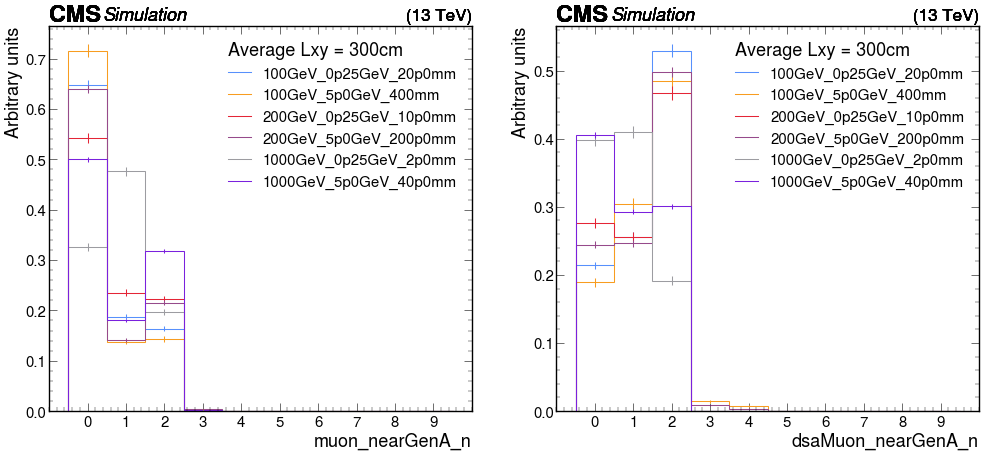

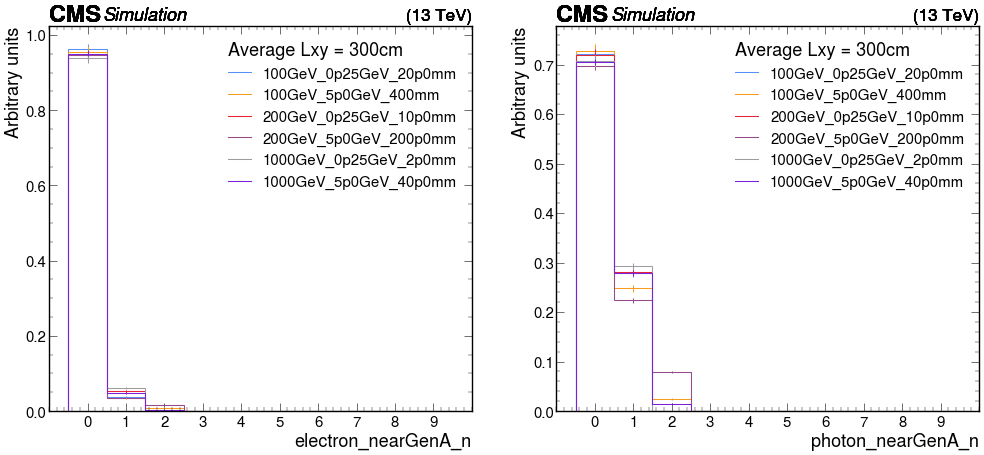

In [31]:
legend_entries = [s[6:] for s in samples_300cm]
nplots = 2

# number of muons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples_300cm:
    utilities.plot(out_300cm[sample]["hists"]["muon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 300cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of DSA muons near dark photon
plt.subplot(1, nplots, 2)
for sample in samples_300cm:
    utilities.plot(out_300cm[sample]["hists"]["dsaMuon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 300cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of electrons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples_300cm:
    utilities.plot(out_300cm[sample]["hists"]["electron_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 300cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of photons near dark photon
plt.subplot(1, nplots, 2)
for sample in samples_300cm:
    utilities.plot(out_300cm[sample]["hists"]["photon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 300cm", alignment="left")
plt.ylabel("Arbitrary units")

Observations:
- $\geq$2 photon reconstructions don't happen
- $\geq$2 DSA muon reconstructions are much more rare than I would expect

Would probably be good to plot these as a function of dark photon Lxy for a couple mass points. Maybe I can make 4 separate 2D hists then do some mpl magic to align them such that they share a single Lxy axis. At the moment, the normalization of these plots make them a little harder to interpret (it would be better if they were efficiency plots),

In [41]:
import numpy as np

def make_eff(h):
    weights = 1/np.sum(h.values(), axis=-1)
    weights = np.nan_to_num(weights)
    for ix in range(h.shape[1]):
        h[:, ix] = np.column_stack([h.values()[:, ix]*weights, h.variances()[:, ix]*weights])
    return h

def plot_single(h, eff, vmax, skip_label=True, remove_xlabel=True):
    h = h[channels[0], :, :]
    if eff:
        h = make_eff(h)
    utilities.plot(h[:400j, 1:3], skip_label=skip_label, cbar=False, cmax=vmax, flow="none")
    if remove_xlabel:
        plt.xlabel(None)
    plt.draw()
    

def plot_all_vs_lxy(proc_output, sample, vmax=1000, eff=True, suffix=""):
    vmax = 1 if eff else vmax
    fig, ax = plt.subplots(4, 1, figsize=(30, 10), sharex=True)
    plt.subplot(4, 1, 1)
    plot_single(proc_output[sample]["hists"]["electron_nearGenA_n_genA_lxy"], eff, vmax, skip_label=False)
    plt.subplot(4, 1, 2)
    plot_single(proc_output[sample]["hists"]["photon_nearGenA_n_genA_lxy"], eff, vmax)
    plt.subplot(4, 1, 3)
    plot_single(proc_output[sample]["hists"]["muon_nearGenA_n_genA_lxy"], eff, vmax)
    plt.subplot(4, 1, 4)
    plot_single(proc_output[sample]["hists"]["dsaMuon_nearGenA_n_genA_lxy"], eff, vmax, remove_xlabel=False)
    
    fig.subplots_adjust(hspace=0)
    bs_mass, dp_mass = sample.split("_")[1:3]
    dp_mass.replace("p", ".")
    fig.suptitle(f"DM bound state mass = {bs_mass}, dark photon mass = {dp_mass}")
    cb = fig.colorbar(plt.gca().collections[0], ax=ax.ravel().tolist(), pad=0.01)
    cb.set_label("Fraction of dark photon decays", labelpad=20)
    
    #plt.savefig(f"{sidm_path}/plots/lepton_reco_vs_lxy_{sample}{suffix}.png", bbox_inches="tight")

/tmp/ipykernel_537/1900619807.py:4: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)
/tmp/ipykernel_537/1900619807.py:4: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)
/tmp/ipykernel_537/1900619807.py:4: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)
/tmp/ipykernel_537/1900619807.py:4: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)
/tmp/ipykernel_537/1900619807.py:4: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)
/tmp/ipykernel_537/1900619807.py:4: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)
/tmp/ipykernel_537/1900619807.py:4: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)
/tmp/ipykernel_537/1900619807.py:4: RuntimeWarning: divide by zero encountered in d

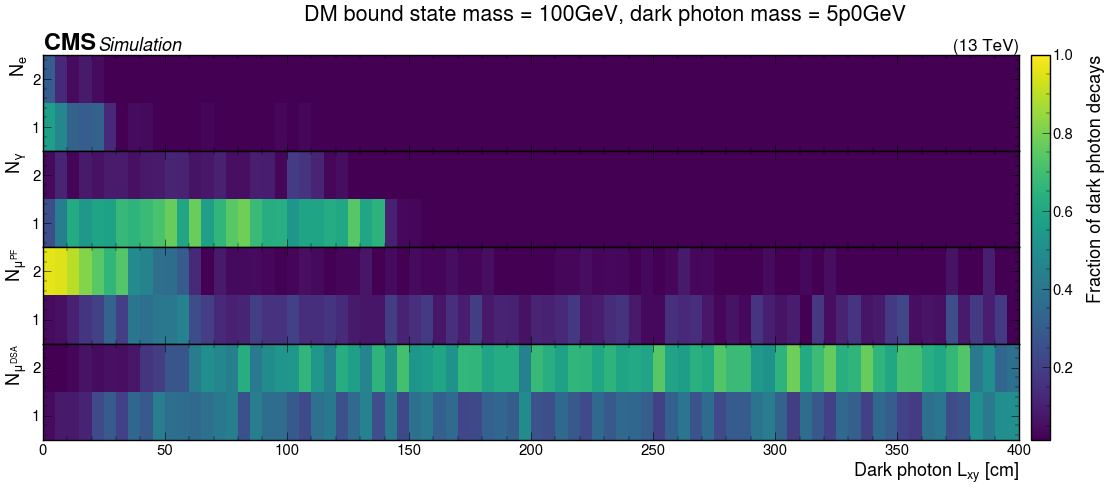

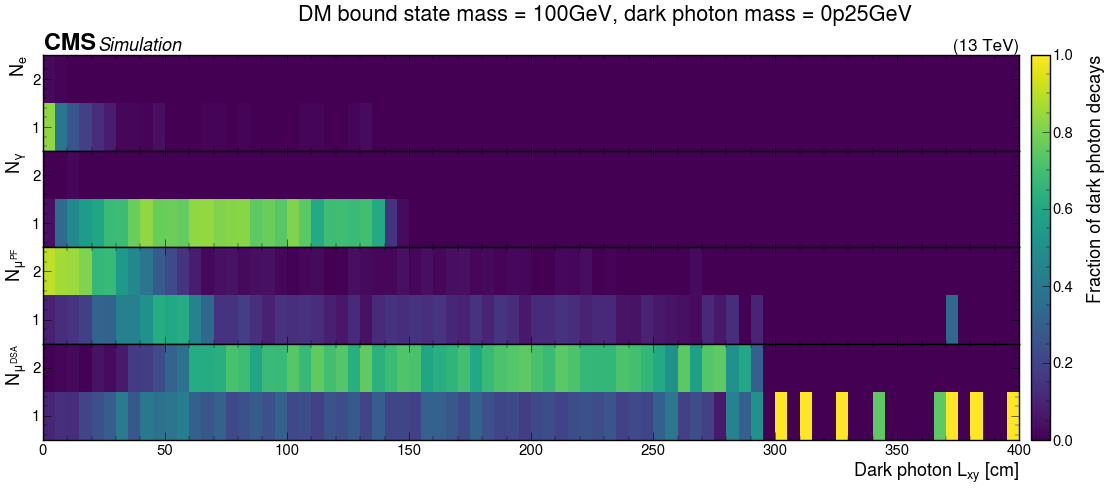

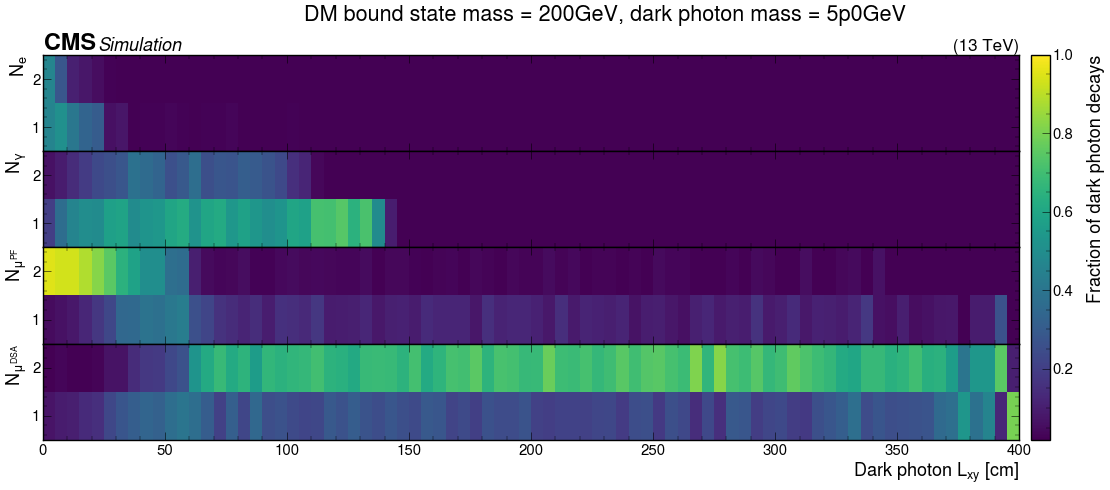

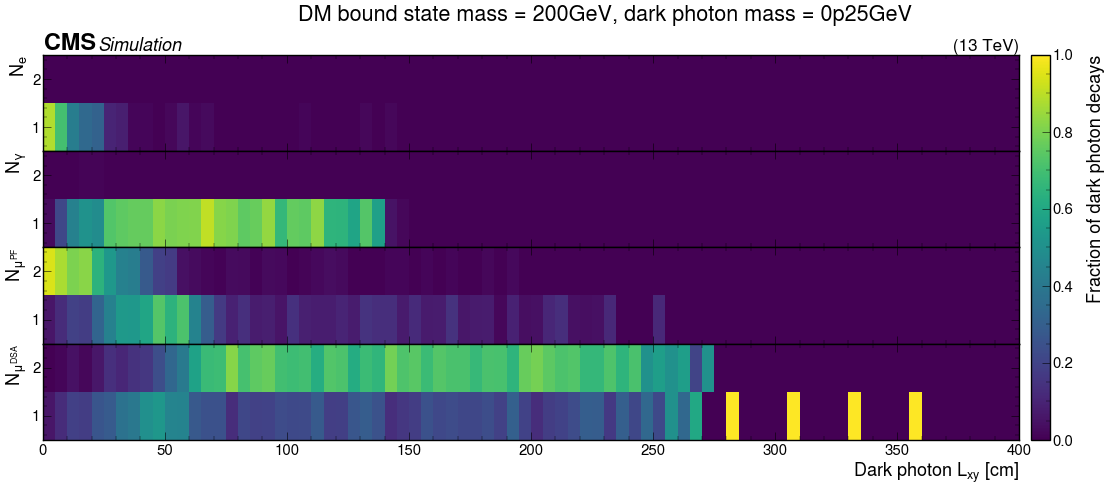

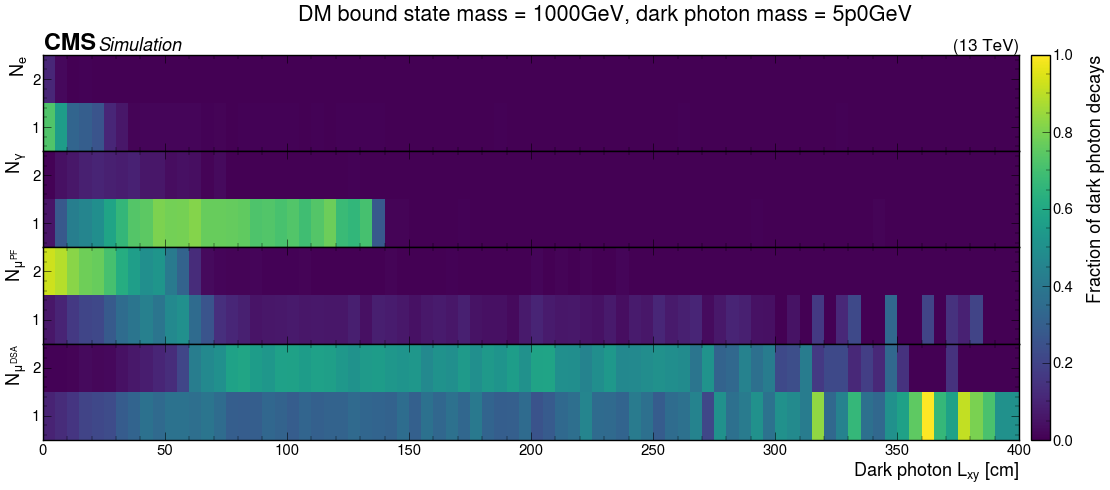

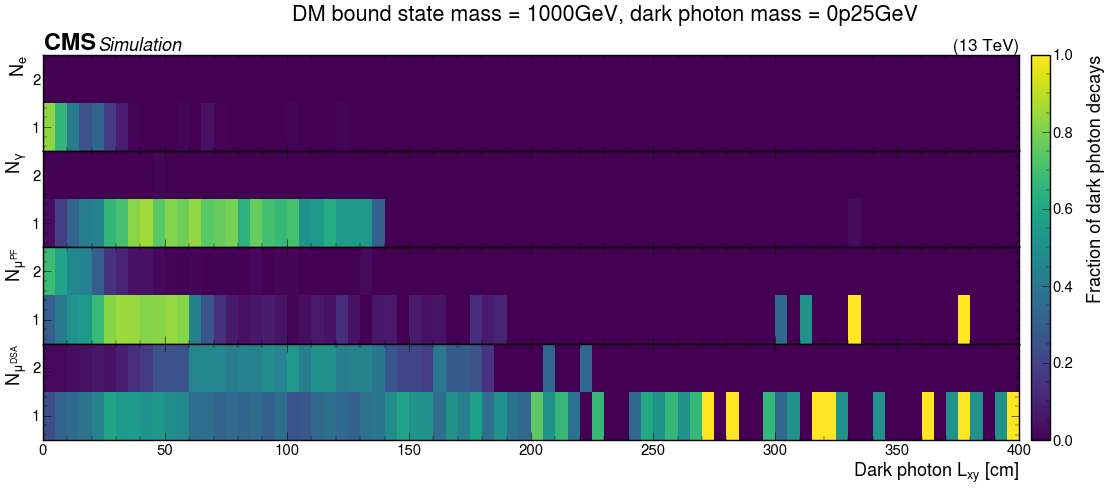

In [42]:
channels = ["baseNoLj"]
plot_all_vs_lxy(out_300cm, "2Mu2E_100GeV_5p0GeV_400mm")
plot_all_vs_lxy(out_300cm, "2Mu2E_100GeV_0p25GeV_20p0mm")
plot_all_vs_lxy(out_300cm, "2Mu2E_200GeV_5p0GeV_200p0mm")
plot_all_vs_lxy(out_300cm, "2Mu2E_200GeV_0p25GeV_10p0mm")
plot_all_vs_lxy(out_300cm, "2Mu2E_1000GeV_5p0GeV_40p0mm")
plot_all_vs_lxy(out_300cm, "2Mu2E_1000GeV_0p25GeV_2p0mm")

Next, remake above plots without applying ljsource cuts.

In [33]:
channels = ["baseNoLjNoLjsource"]
p = sidm_processor.SidmProcessor(
    channels,
    ["lepton_genA_base"],
)

In [19]:
output_3cm_noLjSourceCuts = runner.run(fileset_3cm, treename="Events", processor_instance=p)
out_3cm_noLjSourceCuts = output_3cm_noLjSourceCuts["out"]

Output()

2Mu2E_1000GeV_5p0GeV_0p4mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_100GeV_0p25GeV_0p2mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_100GeV_5p0GeV_4p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_1000GeV_0p25GeV_0p02mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb


Text(0, 1, 'Arbitrary units')

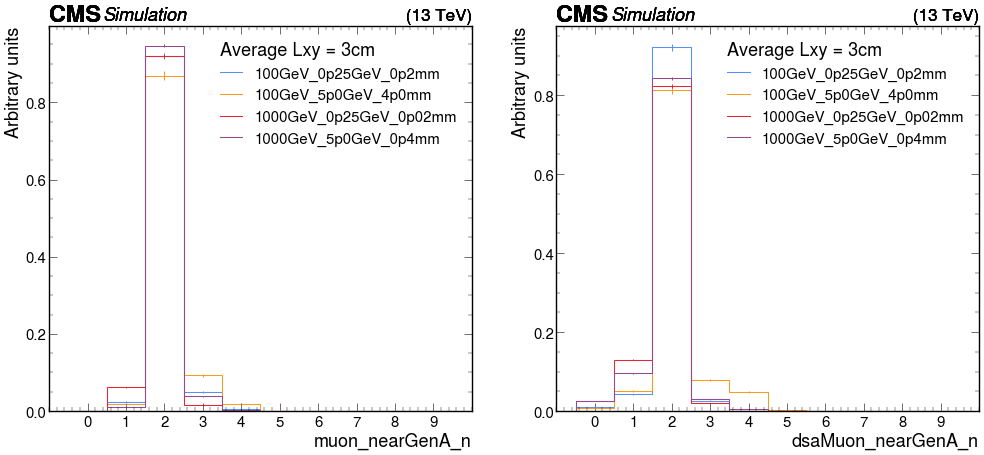

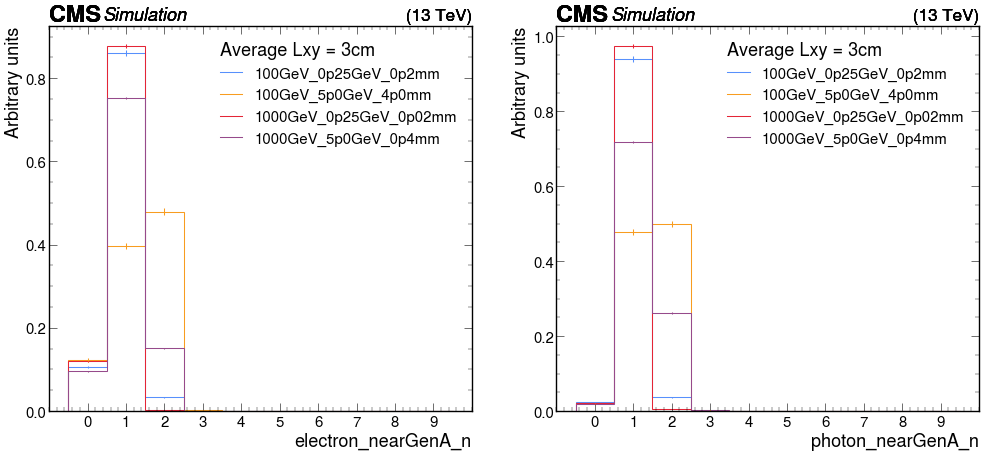

In [34]:
legend_entries = [s[6:] for s in samples_3cm]
nplots = 2

# number of muons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples_3cm:
    utilities.plot(out_3cm_noLjSourceCuts[sample]["hists"]["muon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 3cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of DSA muons near dark photon
plt.subplot(1, nplots, 2)
for sample in samples_3cm:
    utilities.plot(out_3cm_noLjSourceCuts[sample]["hists"]["dsaMuon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 3cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of electrons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples_3cm:
    utilities.plot(out_3cm_noLjSourceCuts[sample]["hists"]["electron_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 3cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of photons near dark photon
plt.subplot(1, nplots, 2)
for sample in samples_3cm:
    utilities.plot(out_3cm_noLjSourceCuts[sample]["hists"]["photon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 3cm", alignment="left")
plt.ylabel("Arbitrary units")

In [21]:
output_300cm_noLjSourceCuts = runner.run(fileset_300cm, treename="Events", processor_instance=p)
out_300cm_noLjSourceCuts = output_300cm_noLjSourceCuts["out"]

Output()

2Mu2E_1000GeV_5p0GeV_40p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_100GeV_0p25GeV_20p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_100GeV_5p0GeV_400mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_200GeV_0p25GeV_10p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_200GeV_5p0GeV_200p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_1000GeV_0p25GeV_2p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb


Text(0, 1, 'Arbitrary units')

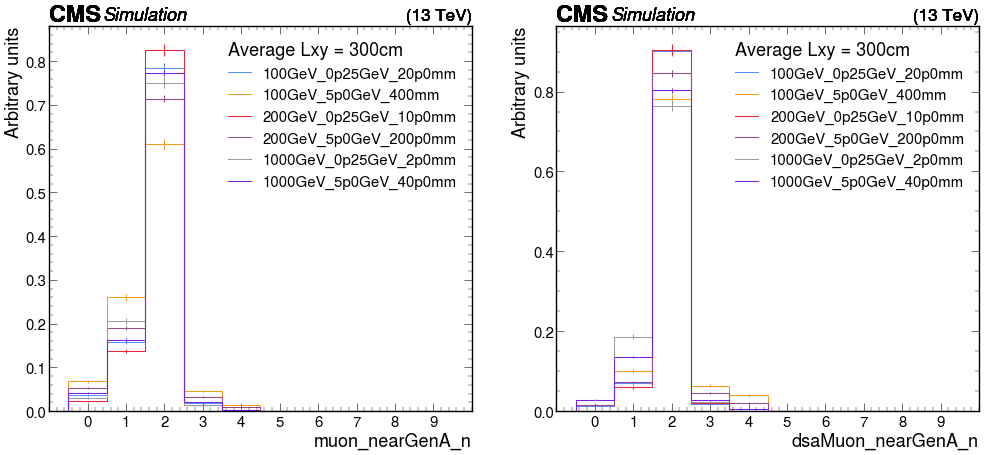

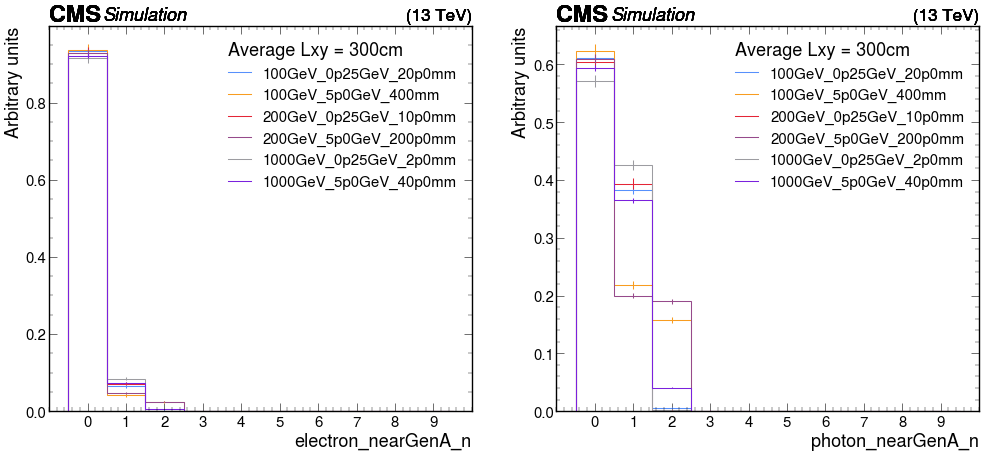

In [35]:
legend_entries = [s[6:] for s in samples_300cm]
nplots = 2

# number of muons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples_300cm:
    utilities.plot(out_300cm_noLjSourceCuts[sample]["hists"]["muon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 300cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of DSA muons near dark photon
plt.subplot(1, nplots, 2)
for sample in samples_300cm:
    utilities.plot(out_300cm_noLjSourceCuts[sample]["hists"]["dsaMuon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 300cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of electrons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1, nplots, 1)
for sample in samples_300cm:
    utilities.plot(out_300cm_noLjSourceCuts[sample]["hists"]["electron_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 300cm", alignment="left")
plt.ylabel("Arbitrary units")

# number of photons near dark photon
plt.subplot(1, nplots, 2)
for sample in samples_300cm:
    utilities.plot(out_300cm_noLjSourceCuts[sample]["hists"]["photon_nearGenA_n"][channels[0], :], density=True)
plt.legend(legend_entries, title="Average Lxy = 300cm", alignment="left")
plt.ylabel("Arbitrary units")

/tmp/ipykernel_537/1900619807.py:4: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)
/tmp/ipykernel_537/1900619807.py:4: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)
/tmp/ipykernel_537/1900619807.py:4: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)
/tmp/ipykernel_537/1900619807.py:4: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)
/tmp/ipykernel_537/1900619807.py:4: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)
/tmp/ipykernel_537/1900619807.py:4: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)
/tmp/ipykernel_537/1900619807.py:4: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)
/tmp/ipykernel_537/1900619807.py:4: RuntimeWarning: divide by zero encountered in d

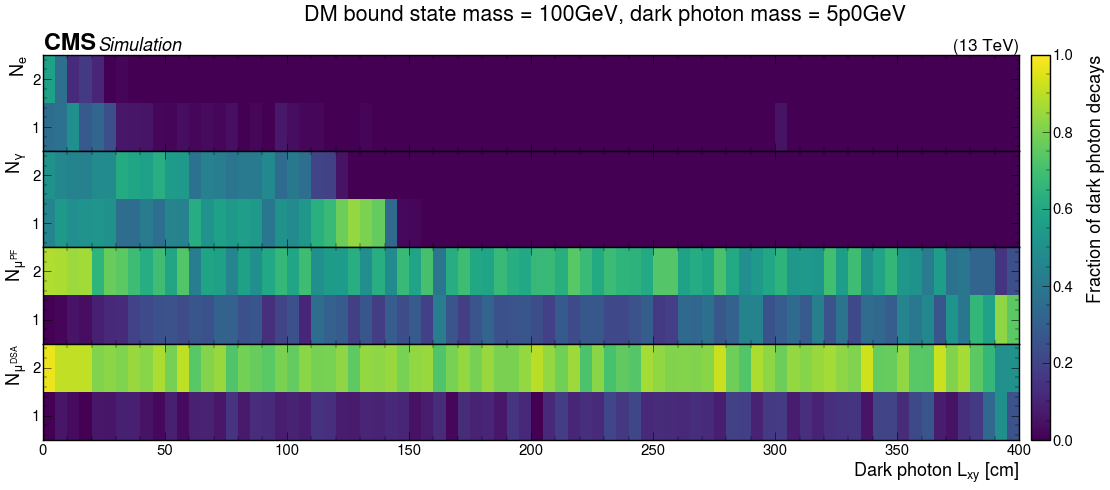

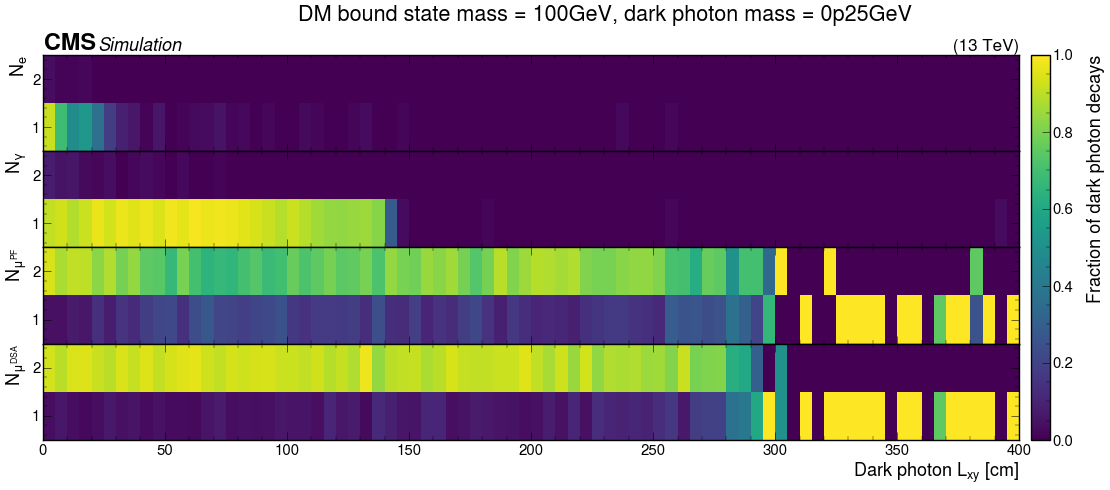

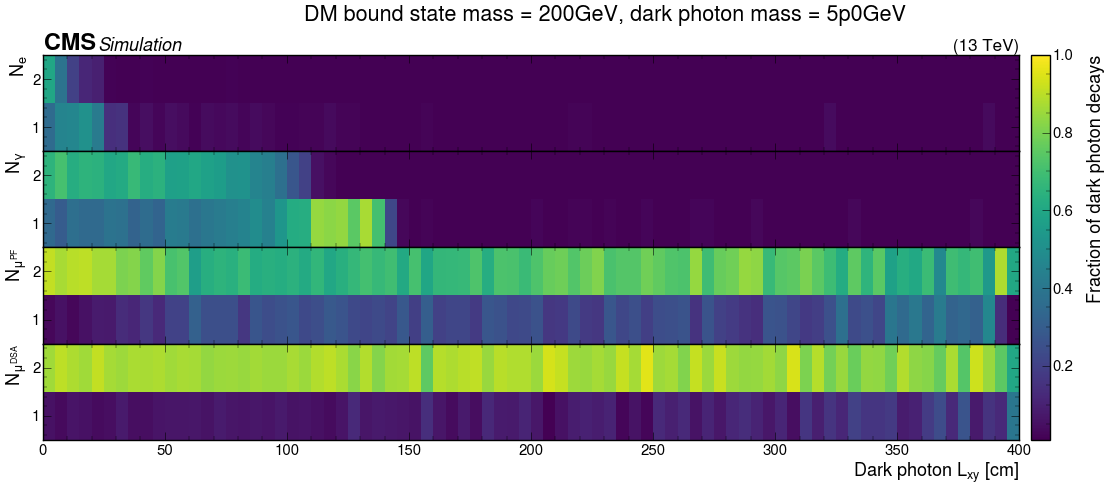

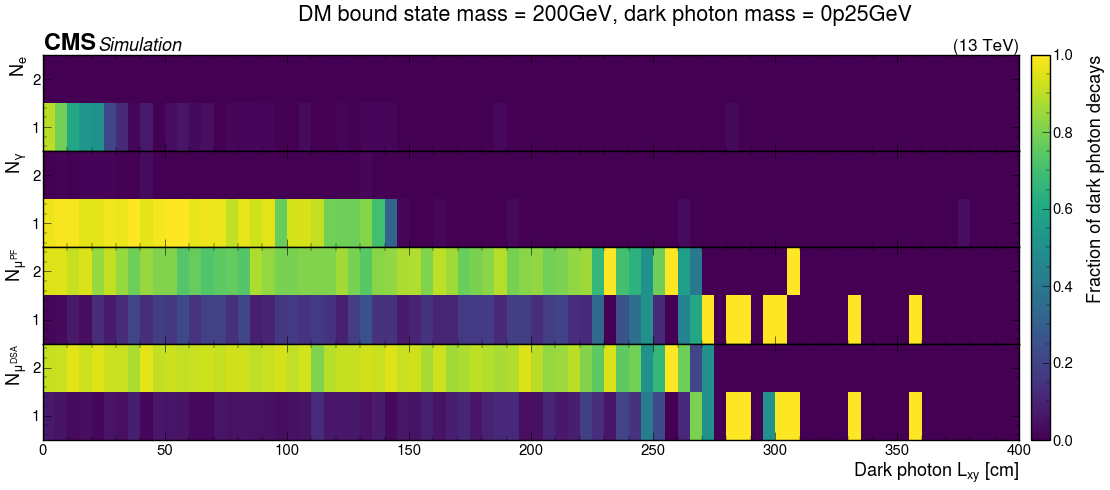

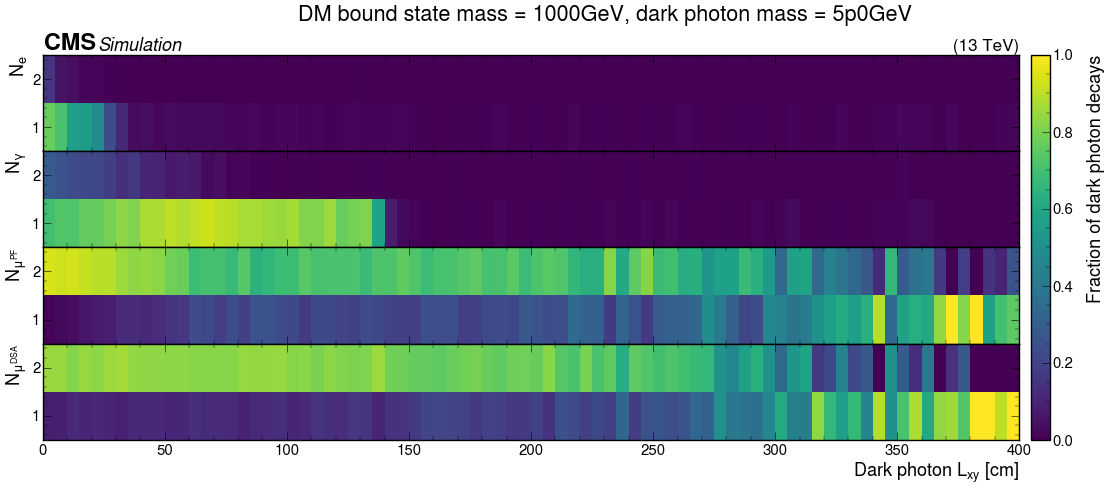

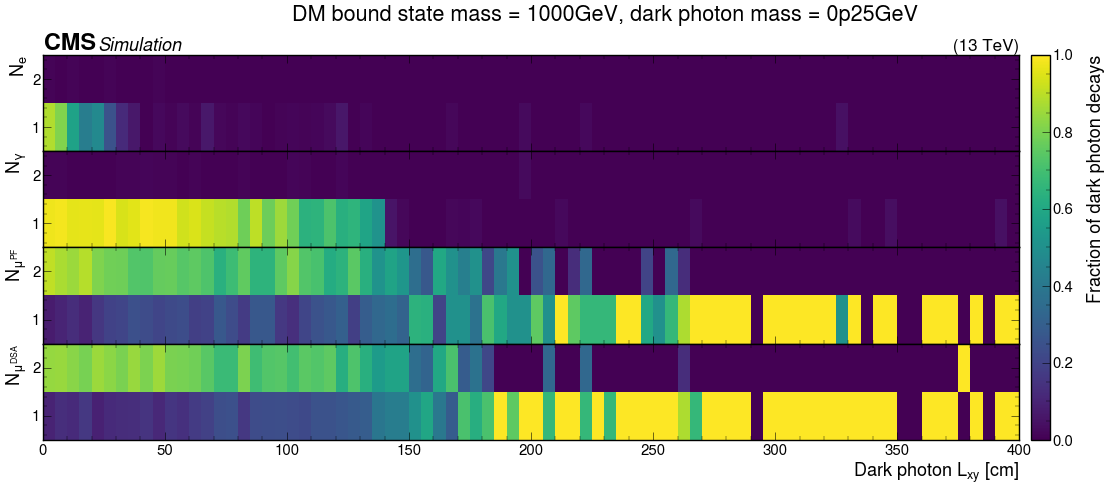

In [43]:
channels = ["baseNoLjNoLjsource"]
plot_all_vs_lxy(out_300cm_noLjSourceCuts, "2Mu2E_100GeV_5p0GeV_400mm", suffix="_noLjSourceCuts")
plot_all_vs_lxy(out_300cm_noLjSourceCuts, "2Mu2E_100GeV_0p25GeV_20p0mm", suffix="_noLjSourceCuts")
plot_all_vs_lxy(out_300cm_noLjSourceCuts, "2Mu2E_200GeV_5p0GeV_200p0mm", suffix="_noLjSourceCuts")
plot_all_vs_lxy(out_300cm_noLjSourceCuts, "2Mu2E_200GeV_0p25GeV_10p0mm", suffix="_noLjSourceCuts")
plot_all_vs_lxy(out_300cm_noLjSourceCuts, "2Mu2E_1000GeV_5p0GeV_40p0mm", suffix="_noLjSourceCuts")
plot_all_vs_lxy(out_300cm_noLjSourceCuts, "2Mu2E_1000GeV_0p25GeV_2p0mm", suffix="_noLjSourceCuts")

In [25]:
# save all outputs
import coffea.util
coffea.util.save(output, 'output_leptonReco_0p3cm.coffea')
coffea.util.save(output_3cm, 'output_leptonReco_3cm.coffea')
coffea.util.save(output_30cm, 'output_leptonReco_30cm.coffea')
coffea.util.save(output_300cm, 'output_leptonReco_300cm.coffea')
coffea.util.save(output_3cm_noLjSourceCuts, 'output_leptonReco_3cm_noLjSourceCuts.coffea')
coffea.util.save(output_300cm_noLjSourceCuts, 'output_leptonReco_300cm_noLjSourceCuts.coffea')